In [146]:
# import the libraries
import pandas as pd
rhode_island =pd.read_csv('police.csv')


In [147]:
# inspect the head of the dataset
rhode_island.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [148]:
# there are column that has Nan values
#so let us do find the null values
rhode_island.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [149]:
rhode_island.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [150]:
# now let us  check the shape of the data
rhode_island.shape

(91741, 15)

In [151]:
#so it shows that all the values in the column 'country_name' is null.
# we can drop this column
rhode_island.drop('county_name' , inplace = True , axis = 'columns')

In [152]:
rhode_island.shape

(91741, 14)

In [153]:
# since the county name is associated with the state as we have dropped the county name
# let me also drop the state
rhode_island.drop('state' , inplace = True , axis = 'columns')

In [154]:
rhode_island.shape

(91741, 13)

In [155]:
# some columns are going to be very critical to the analysis
#therefore it is essential that if some rows of those columns are having
# nan values to remove those rows
rhode_island.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [156]:
#from the above analysis it is evident that the data relating to the driver_gender is going to be important
# and it has 5205 nan field please remove these rows
rhode_island.dropna(subset=['driver_gender'] , inplace =True)

In [157]:
rhode_island.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [158]:
rhode_island.shape
# we see around 5000 rows were removed from the dataset

(86536, 13)

In [159]:
# check the datatype
rhode_island.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [160]:
# Examine the head of the 'is_arrested' column
print(rhode_island.is_arrested.head())

# Check the data type of 'is_arrested'
print(rhode_island.is_arrested.dtypes)

# Change the data type of 'is_arrested' to 'bool'
rhode_island['is_arrested'] = rhode_island.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(rhode_island.is_arrested.dtypes)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


In [161]:
rhode_island.head()


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [162]:
# let us combine the stop_date and stop_time
#create a new series combined
combined = rhode_island.stop_date.str.cat(rhode_island.stop_time , sep = ' ')

In [163]:
rhode_island['Stop_date_and_time']=pd.to_datetime(combined)

In [164]:
rhode_island.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Stop_date_and_time
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [165]:
# let us now set the index to stop_date_and_time
rhode_island.set_index('Stop_date_and_time' , inplace = True )

In [166]:
rhode_island.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='Stop_date_and_time', length=86536, freq=None)

In [167]:
rhode_island.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [168]:
# the Stop_date_and_time is no more a part of the columns



In [169]:
# Gender and Policing
#use of value_count() is more suitable for categorical datatype instead of numerical
rhode_island.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [170]:
#stop_outcome is an categorical datatype
rhode_island.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [171]:
rhode_island.stop_outcome.value_counts().sum()

86536

In [172]:
rhode_island.shape

(86536, 13)

In [173]:
#so there is no missing values
# now lets get the proportion of various warnings
rhode_island.stop_outcome.value_counts(normalize= True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [174]:
# Do the same analysis on the other categorical value the driver race
rhode_island.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [175]:
rhode_island.driver_race.value_counts().sum()

86536

In [176]:
rhode_island.shape

(86536, 13)

In [177]:
# there is no missing values


In [178]:
# get the proportion of drivers by race
rhode_island.driver_race.value_counts(normalize=True)

White       0.714963
Black       0.141964
Hispanic    0.112404
Asian       0.027607
Other       0.003062
Name: driver_race, dtype: float64

In [179]:
#Suppose I want to do analysis of the columns 'white only'
white =rhode_island[rhode_island.driver_race=='White']

In [180]:
white.shape #white is now a time series

(61870, 13)

In [182]:
white.columns # I get all the columns for the time series that I created

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [183]:
white.stop_outcome.value_counts(normalize =True) # for the white time series I get to calculate values count for each columns

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [184]:
asian = rhode_island[rhode_island.driver_race=='Asian']

In [185]:
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

In [186]:
blacks = rhode_island[rhode_island.driver_race=='Black']

In [187]:
blacks.stop_outcome.value_counts(normalize=True)

Citation            0.857224
Warning             0.065120
Arrest Driver       0.054294
N/D                 0.008547
Arrest Passenger    0.008303
No Action           0.006512
Name: stop_outcome, dtype: float64

In [188]:
# gender , race and outcome
white.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [189]:
white.driver_gender.value_counts(normalize=True)

M    0.700404
F    0.299596
Name: driver_gender, dtype: float64

In [190]:
asian.driver_gender.value_counts(normalize=True)

M    0.76936
F    0.23064
Name: driver_gender, dtype: float64

In [191]:
blacks.driver_gender.value_counts(normalize=True)

M    0.781766
F    0.218234
Name: driver_gender, dtype: float64

In [192]:
rhode_island.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [193]:
rhode_island.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [194]:
rhode_island.columns.value_counts(normalize=True)

search_conducted      0.076923
driver_race           0.076923
search_type           0.076923
violation_raw         0.076923
drugs_related_stop    0.076923
driver_gender         0.076923
district              0.076923
stop_time             0.076923
violation             0.076923
stop_date             0.076923
is_arrested           0.076923
stop_outcome          0.076923
stop_duration         0.076923
dtype: float64

In [195]:
rhode_island.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [196]:
#comparing violation by gender

# Create a DataFrame of female drivers
female = rhode_island[rhode_island.driver_gender=='F']

# Create a DataFrame of male drivers
male = rhode_island[rhode_island.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print('Female \n',female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print('Male \n', male.violation.value_counts(normalize=True))

Female 
 Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Male 
 Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [197]:
# Does Gender and Stop Outcome have something commom?
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = rhode_island[(rhode_island.driver_gender=='F') & (rhode_island.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = rhode_island[(rhode_island.driver_gender=='M') & (rhode_island.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize =True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [198]:
#Does Gender affect whose vehicle is searched?



In [199]:
# Groupby
# police districts
rhode_island.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [200]:
rhode_island.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'], dtype=object)

In [201]:
rhode_island[rhode_island.district=='Zone X4'].is_arrested.mean()

0.04803803937252811

In [202]:
rhode_island[rhode_island.district=='Zone K3'].is_arrested.mean()

0.032310838445807774

In [203]:
rhode_island[rhode_island.district=='Zone K1'].is_arrested.mean()

0.024349083895853423

In [204]:
# i can keep doing this or group all the police district and find the is_arrested mean at a time
rhode_island.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [206]:
# let me check the percentage of search conducted (bool data) based on gender using groupby

rhode_island.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [207]:
#Do this for driver_race ( categorical) for groupby and mean on bool data
rhode_island.groupby('driver_race').search_conducted.mean()

driver_race
Asian       0.020511
Black       0.066992
Hispanic    0.061478
Other       0.011321
White       0.029643
Name: search_conducted, dtype: float64

In [208]:
rhode_island.groupby('driver_race').is_arrested.mean()

driver_race
Asian       0.019255
Black       0.062597
Hispanic    0.062198
Other       0.007547
White       0.026766
Name: is_arrested, dtype: float64

In [209]:
#group by multiple categories
rhode_island.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [210]:
#Do this for race and gender and is arrested
rhode_island.groupby(['driver_race' , 'driver_gender']).is_arrested.mean()

driver_race  driver_gender
Asian        F                0.019964
             M                0.019042
Black        F                0.063409
             M                0.062370
Hispanic     F                0.050691
             M                0.065089
Other        F                0.000000
             M                0.009434
White        F                0.020986
             M                0.029238
Name: is_arrested, dtype: float64

In [211]:
# Check the data type of 'search_conducted'
print(rhode_island.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(rhode_island.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(rhode_island.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092355


In [212]:
#calculate the search done on female 
rhode_island[rhode_island.driver_gender=='F'].search_conducted.mean()

0.019180617481282074

In [213]:
#calculate the search done on male
rhode_island[rhode_island.driver_gender=='M'].search_conducted.mean()

0.045425575985468918

In [214]:
#group them together 
rhode_island.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [215]:
# I can find the % age of arrest by the race say whites : a pandas series
white.groupby('driver_gender').search_conducted.mean()


driver_gender
F    0.015429
M    0.035723
Name: search_conducted, dtype: float64

In [216]:
# I can even do groupby on multiple columns of data in a pandas series
white.groupby(['driver_gender','drugs_related_stop']).is_arrested.mean()

driver_gender  drugs_related_stop
F              False                 0.019772
               True                  0.315789
M              False                 0.026751
               True                  0.283333
Name: is_arrested, dtype: float64

In [218]:
# do this for the blacks
blacks.groupby(['driver_gender','drugs_related_stop']).is_arrested.mean()

driver_gender  drugs_related_stop
F              False                 0.061677
               True                  0.272727
M              False                 0.057629
               True                  0.286432
Name: is_arrested, dtype: float64

In [219]:
blacks.groupby(['driver_gender','drugs_related_stop']).is_arrested.value_counts()

driver_gender  drugs_related_stop  is_arrested
F              False               False          2495
                                   True            164
               True                False            16
                                   True              6
M              False               False          8863
                                   True            542
               True                False           142
                                   True             57
Name: is_arrested, dtype: int64

In [220]:
blacks.groupby(['driver_gender','drugs_related_stop']).is_arrested.sum()

driver_gender  drugs_related_stop
F              False                 164.0
               True                    6.0
M              False                 542.0
               True                   57.0
Name: is_arrested, dtype: float64

In [221]:
# Calculate the search rate for each combination of gender and violation
print('Value Counts \n',rhode_island.groupby(['driver_gender','violation']).search_conducted.value_counts())
# Calculate the search rate for each combination of gender and violation mean
print('Mean \n' ,rhode_island.groupby(['driver_gender','violation']).search_conducted.mean())

Value Counts 
 driver_gender  violation            search_conducted
F              Equipment            False                2401
                                    True                  100
               Moving violation     False                3157
                                    True                  129
               Other                False                 678
                                    True                   29
               Registration/plates  False                 998
                                    True                   58
               Seat belt            False                 568
                                    True                   10
               Speeding             False               15516
                                    True                  130
M              Equipment            False                7818
                                    True                  602
               Moving violation     False               12142
  

In [222]:
# Reverse the ordering to group by violation before gender
print('Mean \n' ,rhode_island.groupby(['violation','driver_gender']).search_conducted.mean())

Mean 
 violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


# Does Gender affects who is frisked during the search?

In [223]:
rhode_island.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [224]:
rhode_island.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [225]:
rhode_island.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [226]:
rhode_island['inventory']= rhode_island.search_type.str.contains('Inventory', na = False)

In [227]:
rhode_island.inventory.dtype

dtype('bool')

In [228]:
rhode_island.inventory.shape

(86536,)

In [229]:
rhode_island.inventory.value_counts()

False    86095
True       441
Name: inventory, dtype: int64

In [230]:
rhode_island.inventory.sum()

441

In [231]:
# Calculating inventory search rate
searched=rhode_island.search_conducted.sum()

In [233]:
#total searches done
searched.sum()

3307

In [234]:
#calculating the inventory
rhode_island.inventory.sum()/searched*100

13.335349259147264

In [237]:
rhode_island.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [238]:
Frisk=rhode_island[rhode_island.search_type=='Protective Frisk'] 

In [239]:
Frisk.search_type.value_counts()

Protective Frisk    164
Name: search_type, dtype: int64

In [240]:
# Count the 'search_type' values
print(rhode_island[rhode_island.search_type=='Protective Frisk'].search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
rhode_island['frisk'] = rhode_island.search_type.str.contains('Protective Frisk', na = False)

# Check the data type of 'frisk'
print(rhode_island.frisk.dtypes)

# Take the sum of 'frisk'
print(rhode_island.frisk.sum())

Protective Frisk    164
Name: search_type, dtype: int64
bool
303


In [241]:
#only frisking 164 and total frisking  including other search types :303

In [242]:
# Create a DataFrame of stops in which a search was conducted
searched = rhode_island[rhode_island.search_conducted==True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.0916238282431
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [243]:
rhode_island.is_arrested.mean()

0.035569011740778401

In [244]:
# Calculate the overall arrest rate
print(rhode_island.is_arrested.mean())

# Calculate the hourly arrest rate
print(rhode_island.groupby(rhode_island.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = rhode_island.groupby(rhode_island.index.hour).is_arrested.mean()

0.0355690117408
Stop_date_and_time
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


#Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

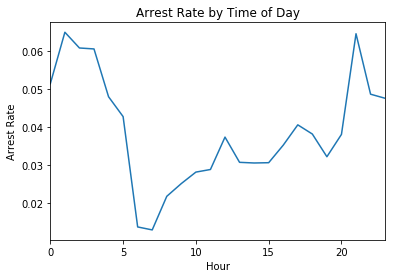

In [245]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')


# Display the plot
plt.show()

# Are drugs related stops on the rise?

In [246]:
#Resampling 
#Concatenating
#subplots

In [249]:
# Calculate the annual rate of drug-related stops
rhode_island.drugs_related_stop.resample('A').mean()

# Save the annual rate of drug-related stops
annual_drug_rate = rhode_island.drugs_related_stop.resample('A').mean()

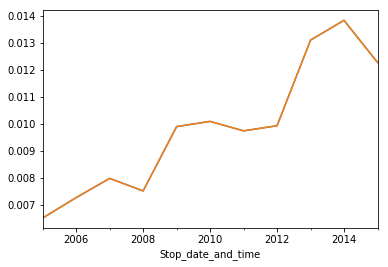

In [251]:
annual_drug_rate.plot()
plt.show()

# Comparing drug and search rates

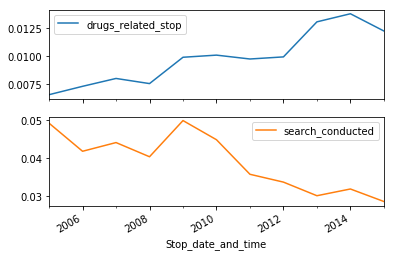

In [253]:
# Calculate and save the annual search rate
annual_search_rate = rhode_island.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [254]:
# Create a frequency table of districts and violations
print(pd.crosstab(rhode_island.district ,rhode_island.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(rhode_island.district ,rhode_island.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

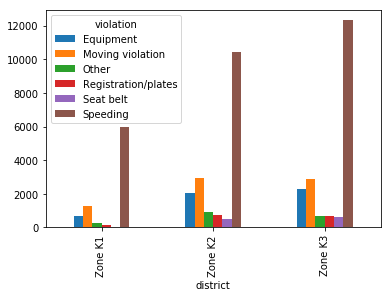

In [255]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()


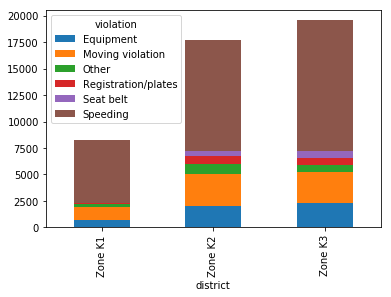

In [256]:
# Create a stacked bar plot of 'k_zones'
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()


# How long might you be stopped for a violation?

In [257]:
# Print the unique values in 'stop_duration'
print(rhode_island.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
rhode_island['stop_minutes'] = rhode_island.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(rhode_island.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


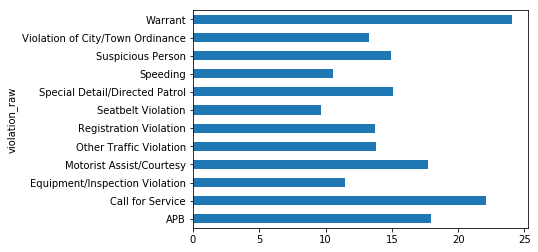

In [258]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(rhode_island.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = rhode_island.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.plot(kind = 'barh')

# Display the plot
plt.show()

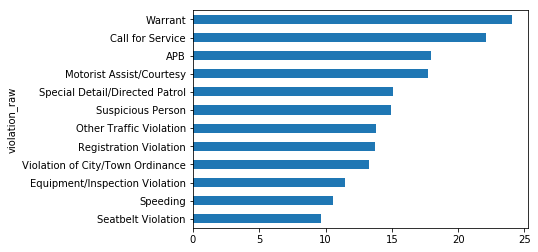

In [259]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = 'barh')
# Display the plot
plt.show()